In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def fit_function(x_values, y_values, function, init_params):
    fitparams, conv = curve_fit(function, x_values, y_values, init_params)
    y_fit = function(x_values, *fitparams)
    
    return fitparams, y_fit

In [22]:
ms = np.loadtxt("Randomized_benchmarking_results/m_Qiskit_Gaussian_detuning=0.txt")
reference = np.loadtxt("Randomized_benchmarking_results/reference_Qiskit_Gaussian_detuning=0.txt")
interleaved = np.loadtxt("Randomized_benchmarking_results/interleaved_Qiskit_Gaussian_detuning=0.txt")

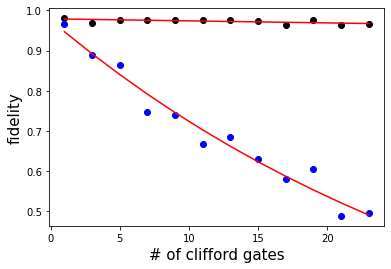

reference_fidelity = 0.9997387264461016
interleaved_fidelity = 0.9850315380021915


In [14]:
fit_params1, y_fit1 = fit_function(ms,
                                 reference, 
                                 lambda m, fidelity, A: (A *(2*fidelity - 1)** m ),
                                 [0.95, 1])

fit_params2, y_fit2 = fit_function(ms,
                                 interleaved, 
                                 lambda m, fidelity, A: (A *(2*fidelity - 1)** m ),
                                 [0.95, 1])



plt.scatter(ms, reference, color='black')
plt.scatter(ms, interleaved, color='blue')

plt.plot(ms, y_fit1, color='red')
plt.plot(ms, y_fit2, color='red')

reference_fidelity = fit_params1[0] 
interleaved_fidelity = fit_params2[0] * fit_params1[0]
plt.xlabel("# of clifford gates", fontsize=15)
plt.ylabel("fidelity", fontsize=15)
plt.show()
print('reference_fidelity =', reference_fidelity)
print('interleaved_fidelity =', interleaved_fidelity)

In [16]:
def save_results(ms, reference_fidelity, interleaved_fidelity, file_name):
    np.savetxt('m_'+ file_name + ".txt", ms)
    np.savetxt('reference_'+ file_name + ".txt", reference_fidelity)
    np.savetxt('interleaved_'+ file_name + ".txt", interleaved_fidelity)


In [18]:
def load_results(file_name):
    ms = np.loadtxt('m_'+ file_name + ".txt")
    reference_fidelity = np.loadtxt('reference_'+ file_name + ".txt")
    interleaved_fidelity = np.loadtxt('interleaved_'+ file_name + ".txt")
    return ms, reference_fidelity, interleaved_fidelity

In [20]:
def fit_results(ms, reference, interleaved):
    fit_params1, y_fit1 = fit_function(ms,
                                 reference, 
                                 lambda m, fidelity, A: (A *(2*fidelity - 1)** m ),
                                 [0.95, 1])

    fit_params2, y_fit2 = fit_function(ms,
                                 interleaved, 
                                 lambda m, fidelity, A: (A *(2*fidelity - 1)** m ),
                                 [0.95, 1])



    plt.scatter(ms, reference, color='black')
    plt.scatter(ms, interleaved, color='blue')

    plt.plot(ms, y_fit1, color='red')
    plt.plot(ms, y_fit2, color='red')

    reference_fidelity = fit_params1[0] 
    interleaved_fidelity = fit_params2[0] * fit_params1[0]
    plt.xlabel("# of clifford gates", fontsize=15)
    plt.ylabel("fidelity", fontsize=15)
    plt.show()
    print('reference_fidelity =', reference_fidelity)
    print('interleaved_fidelity =', interleaved_fidelity)
    return reference_fidelity, interleaved_fidelity

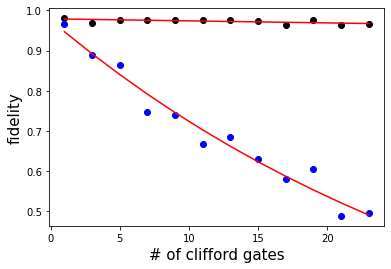

reference_fidelity = 0.9997387264461016
interleaved_fidelity = 0.9850315380021915


(0.9997387264461016, 0.9850315380021915)

In [23]:
fit_results(ms, reference, interleaved)